Question 1 (40 pt)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

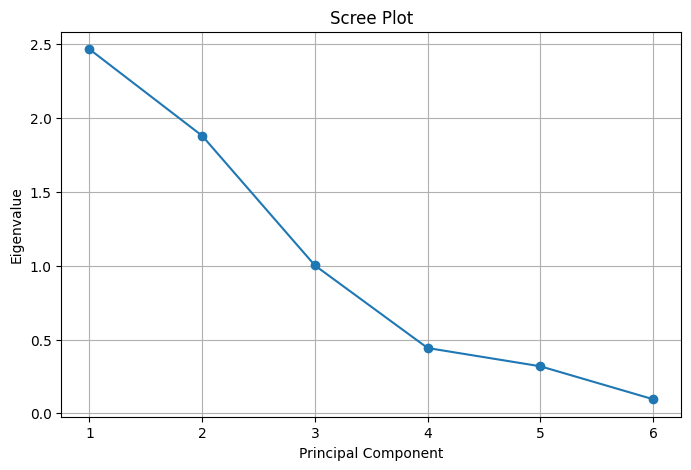


Eigenvalues:
PC1: 2.467
PC2: 1.880
PC3: 1.002
PC4: 0.443
PC5: 0.319
PC6: 0.096

Explained Variance Ratio (%):
PC1: 39.75%
PC2: 30.30%
PC3: 16.15%
PC4: 7.13%
PC5: 5.14%
PC6: 1.54%

Cumulative Variance Explained (%):
Up to PC1: 39.75%
Up to PC2: 70.04%
Up to PC3: 86.19%
Up to PC4: 93.32%
Up to PC5: 98.46%
Up to PC6: 100.00%

Factor Loadings:
     PC1   PC2   PC3   PC4   PC5   PC6
V1 -0.30 -0.61 -0.18 -0.11  0.28  0.64
V2  0.50 -0.26 -0.08  0.70  0.42 -0.11
V3 -0.36 -0.57 -0.19  0.04 -0.20 -0.68
V4  0.53 -0.21 -0.04 -0.71  0.34 -0.23
V5  0.16  0.20 -0.94 -0.01 -0.21  0.08
V6  0.47 -0.38  0.19  0.02 -0.74  0.23


In [5]:


import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv"
df = pd.read_csv(url)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(df_scaled)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(df.columns)+1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

print("\nEigenvalues:")
for idx, val in enumerate(pca.explained_variance_, 1):
    print(f"PC{idx}: {val:.3f}")

print("\nExplained Variance Ratio (%):")
for idx, val in enumerate(pca.explained_variance_ratio_ * 100, 1):
    print(f"PC{idx}: {val:.2f}%")

print("\nCumulative Variance Explained (%):")
for idx, val in enumerate(pca.explained_variance_ratio_.cumsum() * 100, 1):
    print(f"Up to PC{idx}: {val:.2f}%")

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(df.columns))],
                        index=df.columns)

print("\nFactor Loadings:")
print(loadings.round(2))


1)We extract 3 factors, because only the first three principal components have eigenvalues greater than 1

2)Total variance explained = 86.19%

3)The first factor includes V2, V4, and V6, related to shiny teeth, fresh breath, and attractiveness, so it can be called "Aesthetic and Freshness Concern."

 The second factor includes V1 and V3, which focus on cavity prevention and gum health, suggesting "Health and Protection."

The third factor is mainly V5, which downplays the importance of decay prevention, so it can be named "Decay Prevention Rejection."

In [6]:
#Q2 and Q3 is below
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [8]:
#Check that there are no missing data
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9388,0.9811,0.9142,0.9263,0.9201,0.8705,0.8707,1.3980
xgboost,Extreme Gradient Boosting,0.9371,0.9800,0.9154,0.9213,0.9182,0.8671,0.8673,0.6430
gbc,Gradient Boosting Classifier,0.9338,0.9801,0.9013,0.9253,0.9130,0.8596,0.8600,1.4100
rf,Random Forest Classifier,0.9312,0.9768,0.8913,0.9279,0.9089,0.8537,0.8545,0.9720
et,Extra Trees Classifier,0.9290,0.9727,0.8897,0.9241,0.9062,0.8492,0.8500,1.0160
lr,Logistic Regression,0.9263,0.9758,0.8917,0.9152,0.9031,0.8436,0.8440,1.2170
lda,Linear Discriminant Analysis,0.9258,0.9742,0.8865,0.9183,0.9020,0.8423,0.8428,0.5370
ridge,Ridge Classifier,0.9253,0.9745,0.8849,0.9186,0.9013,0.8413,0.8418,0.3920
ada,Ada Boost Classifier,0.9253,0.9746,0.8937,0.9109,0.9022,0.8418,0.8420,0.7390
dt,Decision Tree Classifier,0.9079,0.9054,0.8845,0.8780,0.8811,0.8059,0.8061,0.4230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Accuracy: 0.9707792207792207
Precision: 0.9620853080568721
Recall: 0.9611742424242424


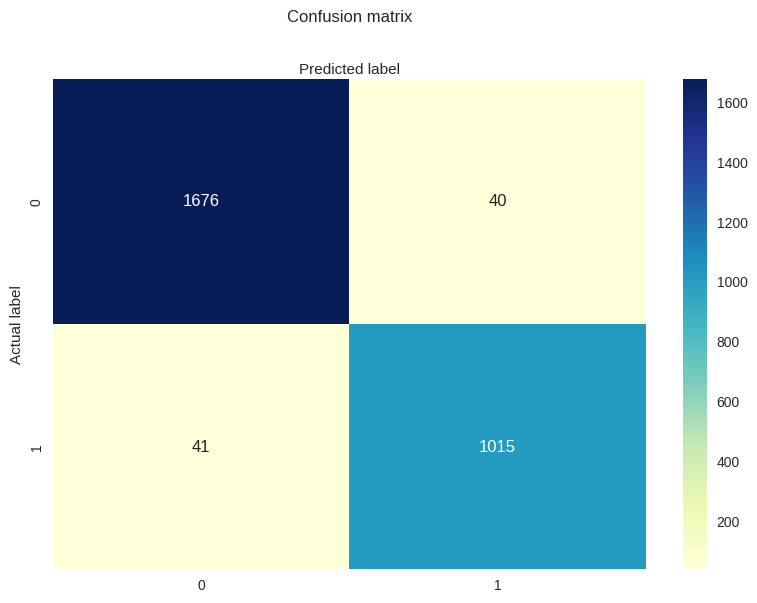

In [13]:
#Q2(30 pt)-Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.
# PyCaret setup and training
from pycaret.classification import *

# Prepare data
data = X.copy()
data['Converted'] = y

# Setup without deprecated parameters
clf1 = setup(data=data, target='Converted', session_id=123,
             train_size=0.7, fold_shuffle=True, verbose=False)

# Train models
best_model = compare_models()

# Finalize and predict
final_model = finalize_model(best_model)
predictions = predict_model(final_model, data=X_test)

# Use correct column name for predicted labels
eval(y_test, predictions['prediction_label'])



Using PyCaret's AutoML tools, the best-performing model achieved an accuracy of 97.08%, with a precision of 96.21% and recall of 96.12%.

This means the model correctly identifies both converted and non-converted leads with high accuracy. The confusion matrix confirms low false positive and false negative rates, indicating strong and reliable performance.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

No path specified. Models will be saved in: "AutogluonModels/ag-20250429_172755"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.54 GB / 12.67 GB (83.2%)
Disk Space Avail:   64.11 GB / 107.72 GB (59.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

Accuracy: 0.9415584415584416
Precision: 0.9232954545454546
Recall: 0.9232954545454546


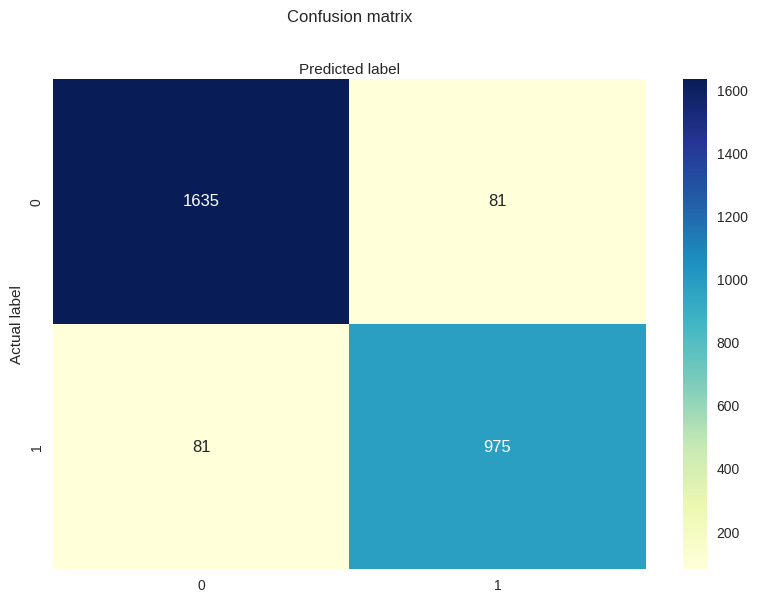

In [20]:
#Q3(30 pt)-Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.
## Step 1: Install AutoGluon (run this only once)
!pip install autogluon --quiet

# Step 2: Import
from autogluon.tabular import TabularPredictor
import pandas as pd

# Step 3: Prepare data
train_data = X_train.copy()
train_data['Converted'] = y_train

test_data = X_test.copy()
test_data['Converted'] = y_test

# Step 4: Fit AutoGluon predictor
predictor = TabularPredictor(label='Converted').fit(train_data)

# Step 5: Predict
predictions = predictor.predict(test_data)

# Step 6: Evaluate using your function
eval(y_test, predictions)


AutoGluon's AutoML model achieved 94.16% accuracy, with both precision and recall at 92.33%.

While still highly accurate, this model slightly underperforms compared to PyCaret's model. The confusion matrix shows more misclassifications (81 false positives and 81 false negatives), suggesting there is more room for improvement.

